In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
df = pd.read_csv("emails.csv")

In [12]:
df = df.drop(columns=['Email No.'])

# 3️ Separate features and target
X = df.drop(columns=['Prediction'])
y = df['Prediction']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 5️ Normalize features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# 6️ Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [16]:
# 7️ Train SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [17]:
# 8️ Evaluate both models
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)

In [18]:
print("🔹 KNN Results 🔹")
print("Accuracy:", acc_knn)
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

🔹 KNN Results 🔹
Accuracy: 0.8454106280193237
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       739
           1       0.66      0.95      0.78       296

    accuracy                           0.85      1035
   macro avg       0.82      0.88      0.83      1035
weighted avg       0.89      0.85      0.85      1035


Confusion Matrix:
 [[593 146]
 [ 14 282]]


In [19]:
print("\n🔹 SVM Results 🔹")
print("Accuracy:", acc_svm)
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


🔹 SVM Results 🔹
Accuracy: 0.9468599033816425
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       739
           1       0.90      0.92      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035


Confusion Matrix:
 [[707  32]
 [ 23 273]]


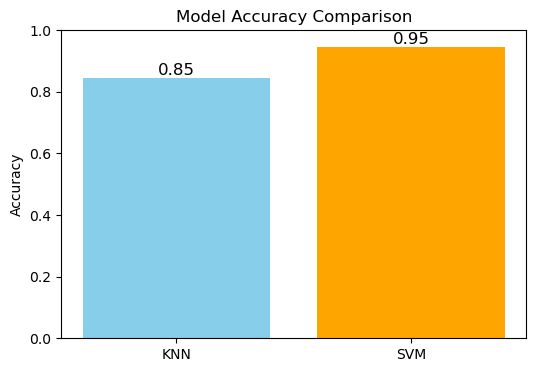

In [21]:
plt.figure(figsize=(6, 4))
plt.bar(["KNN", "SVM"], [acc_knn, acc_svm], color=['skyblue', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, acc in enumerate([acc_knn, acc_svm]):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()